### 5.4.1 스레드 기본 코드

In [1]:
from PyQt5.QtCore import *

In [2]:
class Worker(QThread):
    def run(self):
        while True:
            print('안녕하세요')
            self.sleep(1)

In [3]:
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *

In [4]:
class Worker(QThread):
    def run(self):
        while True:
            print('안녕하세요')
            self.sleep(1)
            
class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.worker = Worker()
        self.worker.start()

In [ ]:
app = QApplication(sys.argv)
mywindow = MyWindow()
mywindow.show()
app.exec_()

안녕하세요
안녕하세요
안녕하세요
안녕하세요


### 5.4.2 스레드 적용하기

In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtCore import *
import pybithumb
import time

In [2]:
tickers = ['BTC', 'ETH', 'BCH', 'ETC']

In [3]:
form_class = uic.loadUiType('bull.ui')[0]

In [4]:
class Worker(QThread):
    def run(self):
        while True:
            data = {}
            
            for ticker in tickers:
                data[ticker] = self.get_market_infos(ticker)
                
            print(data)
            time.sleep(5)
            
    def get_market_infos(self, ticker):
        try:
            df = pybithumb.get_ohlcv(ticker)
            ma5 = df['close'].rolling(window=5).mean()
            last_ma5 = ma5[-2]
            
            price = pybithumb.get_current_price(ticker)
            
            state = None
            if price > last_ma5:
                state = '상승장'
            else:
                state = '하락장'
                
            return price, last_ma5, state
        except:
            return None, None, None            

In [5]:
class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        
        self.worker = Worker()
        self.worker.start()

In [ ]:
app = QApplication(sys.argv)
mywindow = MyWindow()
mywindow.show()
app.exec_()

{'BTC': (46910000.0, 46492800.0, '상승장'), 'ETH': (2463000.0, 2434000.0, '상승장'), 'BCH': (330500.0, 331460.0, '하락장'), 'ETC': (23980.0, 22580.0, '상승장')}
{'BTC': (46910000.0, 46492800.0, '상승장'), 'ETH': (2463000.0, 2434000.0, '상승장'), 'BCH': (330500.0, 331460.0, '하락장'), 'ETC': (23980.0, 22580.0, '상승장')}
{'BTC': (46910000.0, 46492800.0, '상승장'), 'ETH': (2463000.0, 2434000.0, '상승장'), 'BCH': (330600.0, 331460.0, '하락장'), 'ETC': (23980.0, 22580.0, '상승장')}
{'BTC': (46904000.0, 46492800.0, '상승장'), 'ETH': (2463000.0, 2434000.0, '상승장'), 'BCH': (330600.0, 331460.0, '하락장'), 'ETC': (23980.0, 22580.0, '상승장')}
{'BTC': (46904000.0, 46492800.0, '상승장'), 'ETH': (2464000.0, 2434000.0, '상승장'), 'BCH': (330600.0, 331460.0, '하락장'), 'ETC': (24010.0, 22580.0, '상승장')}


In [4]:
class Worker(QThread):
    finished = pyqtSignal(dict)

    def run(self):
        while True:
            data = {}

            for ticker in tickers:
                data[ticker] = self.get_market_infos(ticker)

            self.finished.emit(data)
            time.sleep(2)

    def get_market_infos(self, ticker):
        try:
            df = pybithumb.get_ohlcv(ticker)
            ma5 = df['close'].rolling(window=5).mean()
            last_ma5 = ma5[-2]
            price = pybithumb.get_current_price(ticker)

            state = None
            if price > last_ma5:
                state = "상승장"
            else:
                state = "하락장"

            return price, last_ma5, state
        except:
            return None, None, None

class MyWindow(QMainWindow, form_class):
    def __init__(self):
        super().__init__()
        self.setupUi(self)

        self.worker = Worker()
        self.worker.finished.connect(self.update_table_widget)
        self.worker.start()

    @pyqtSlot(dict)
    def update_table_widget(self, data):
        try:
            for ticker, infos in data.items():
                index = tickers.index(ticker)

                self.tableWidget.setItem(index, 0, QTableWidgetItem(ticker))
                self.tableWidget.setItem(index, 1, QTableWidgetItem(str(infos[0])))
                self.tableWidget.setItem(index, 2, QTableWidgetItem(str(infos[1])))
                self.tableWidget.setItem(index, 3, QTableWidgetItem(str(infos[2])))
        except:
            pass

In [5]:
app = QApplication(sys.argv)
window = MyWindow()
window.show()
app.exec_()

0

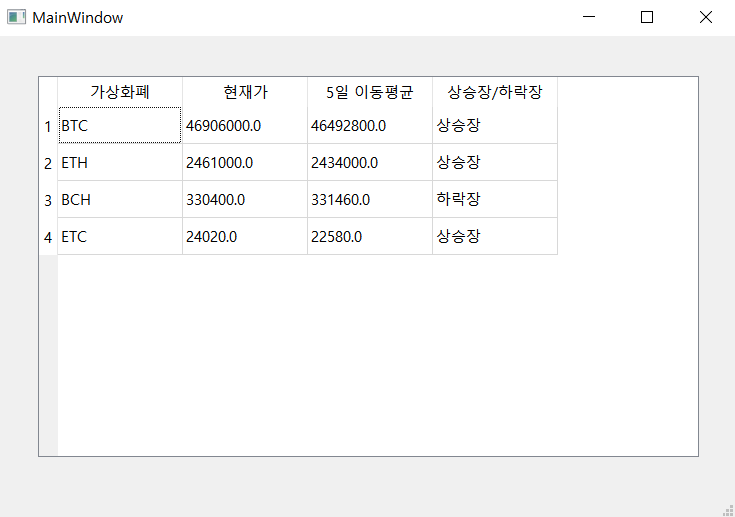